<a href="https://colab.research.google.com/github/sariya77/Home-Cleaning-Services_Analysis_Notebook.ipynb/blob/main/Laundry_Services_csv_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step 1:Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## step 2:load the data


In [ ]:
df=pd.read_csv('Laundry Services .csv')
#list to store output results
output=[]
output.append("Exploratory Data Analysis of Laundry Services .csv\n")
output.append("================================\n")

## step 3 : load the data

In [ ]:
print(df.head())
output.append(f"fisrt few rows:\n{df.head()}\n")

         Date       Product Region Customer_Type  Quantity  Price  Discount  \
0  2024-07-10  Dry Cleaning  South    Occasional        47  83.17      0.05   
1  2024-11-23       Ironing  South       Regular        29  37.67      0.21   
2  2024-11-24  Dry Cleaning  North       Regular        46  86.72      0.24   
3  2024-04-02       Ironing  North    Occasional        29  16.14      0.11   
4  2024-10-27       Washing  South       Regular        33  31.32      0.14   

   Revenue  
0  3713.54  
1   863.02  
2  3031.73  
3   416.57  
4   888.86  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
print(df.describe())
output.append(f"summary statistics:\n{df.describe()}\n")

          Quantity       Price     Discount      Revenue
count  1000.000000  1000.00000  1000.000000  1000.000000
mean     25.758000    51.05199     0.154310  1095.618420
std      14.268673    28.20252     0.088108   926.963752
min       1.000000     5.01000     0.000000     5.460000
25%      13.000000    26.32000     0.080000   354.167500
50%      26.000000    49.97500     0.150000   845.550000
75%      38.000000    77.35750     0.230000  1640.662500
max      50.000000    99.87000     0.300000  4396.830000


## step 4 :clean the data

In [ ]:
output.append("data cleaning results:\n")
missing_values=df.isnull().sum()
print(missing_values)
output.append(f"missing values:\n{missing_values}\n")

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [ ]:
df.dropna(inplace=True)


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
duplicates=df.duplicated().sum()
output.append(f"number of duplicates dropped:{duplicates}\n")
df.drop_duplicates(inplace=True)

## step 5 : analyze the data

In [ ]:
total_revenue=df['Price'].sum()
output.append(f'total Revenue:${total_revenue}\n')
print(f'total revenue:${total_revenue}')

total revenue:$51051.99


In [ ]:
average_price_per_service=df.groupby('Customer_Type')['Price'].mean()
output.append("Average price per customer type:\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)


Customer_Type
Occasional    50.760556
Regular       51.370251
Name: Price, dtype: float64


In [ ]:
total_services_by_region=df['Region'].value_counts()
output.append("Total services provided by region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
East     262
West     254
South    245
North    239
Name: count, dtype: int64


In [ ]:
revenue_by_region=df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)



Region
East     13175.84
North    11589.77
South    13198.02
West     13088.36
Name: Price, dtype: float64


## step 6 :visualize the data

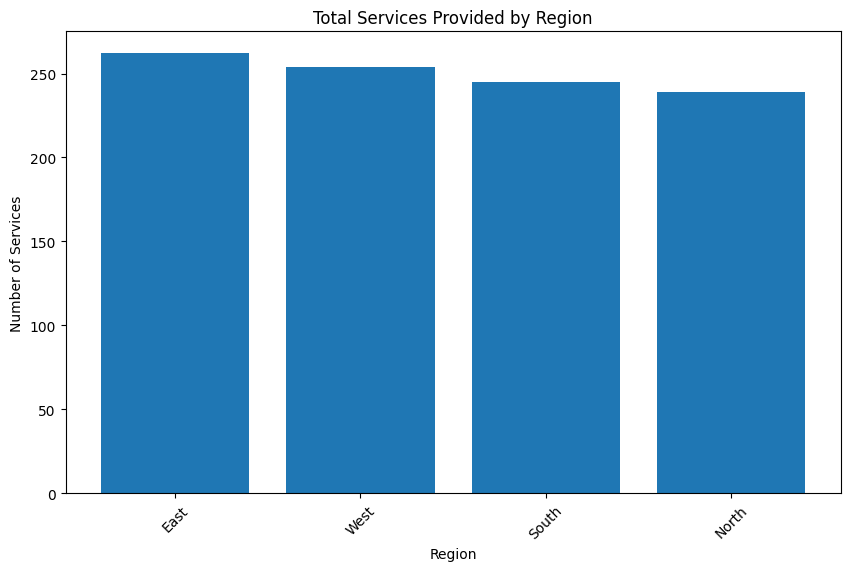

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_region.index,total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')
plt.show()

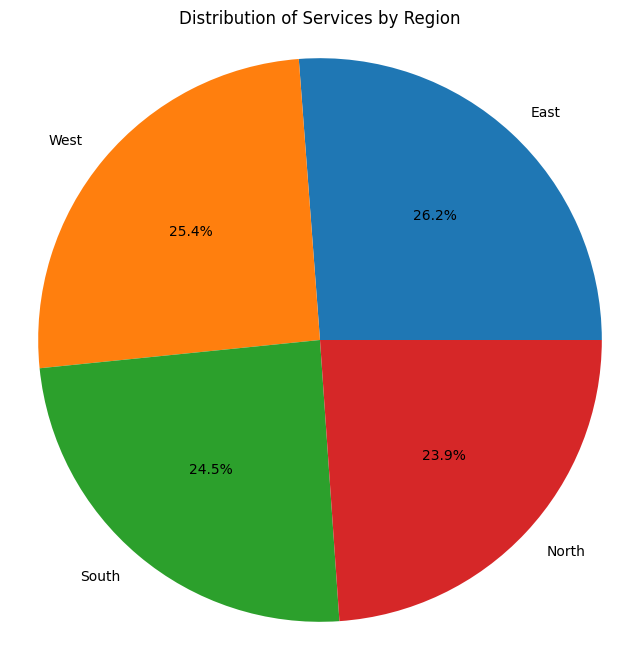

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(total_services_by_region,labels=total_services_by_region.index,autopct='%1.1f%%')
plt.title('Distribution of Services by Region')
plt.axis('equal')
plt.savefig('service_distribution_by_region.png')
plt.show()

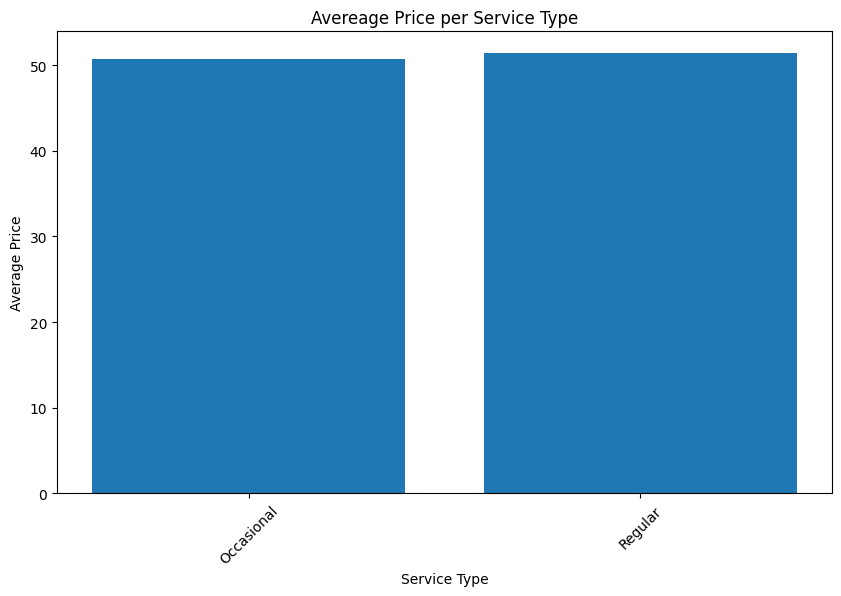

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(average_price_per_service.index,average_price_per_service.values)
plt.title('Avereage Price per Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')
plt.show()

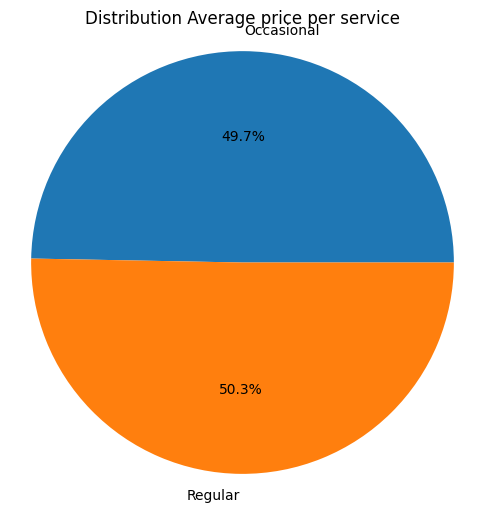

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(average_price_per_service,labels=average_price_per_service.index,autopct='%1.1f%%')
plt.title('Distribution Average price per service')
plt.axis('equal')
plt.savefig('average_price_per_pie.png')
plt.show()

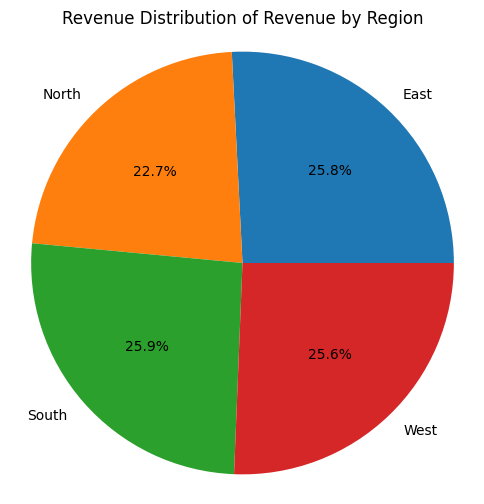

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(revenue_by_region,labels=revenue_by_region.index,autopct='%1.1f%%')
plt.title('Revenue Distribution of Revenue by Region')
plt.axis('equal')
plt.savefig('revenue_by_region.png')
plt.show()

##  save output to text

In [ ]:
with open('analysis_output','w')as f:
  f.writelines(output)